In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [75]:
insurance = pd.read_csv('insurance.csv')

In [76]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
insurance.shape


(1338, 7)

In [78]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [80]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\yugag\AppData\Local\Temp\ipykernel_17740\500830729.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])


Text(0.5, 1.0, 'Age Districution')

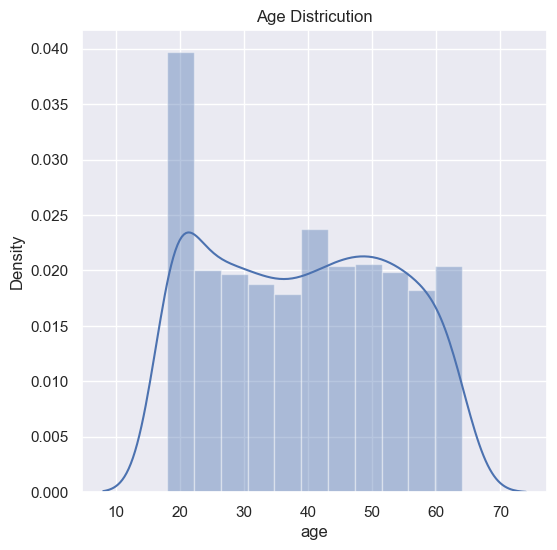

In [81]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['age'])
plt.title('Age Districution')

Text(0.5, 1.0, 'Sex Distribution')

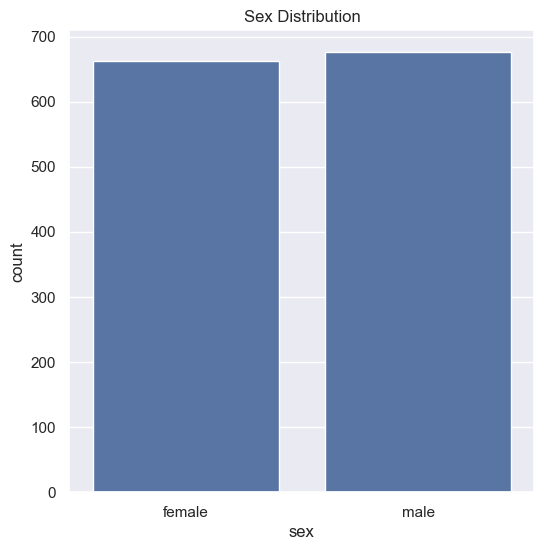

In [82]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance)
plt.title('Sex Distribution')

In [83]:
insurance['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\yugag\AppData\Local\Temp\ipykernel_17740\2894663952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


Text(0.5, 1.0, 'BMI Districution')

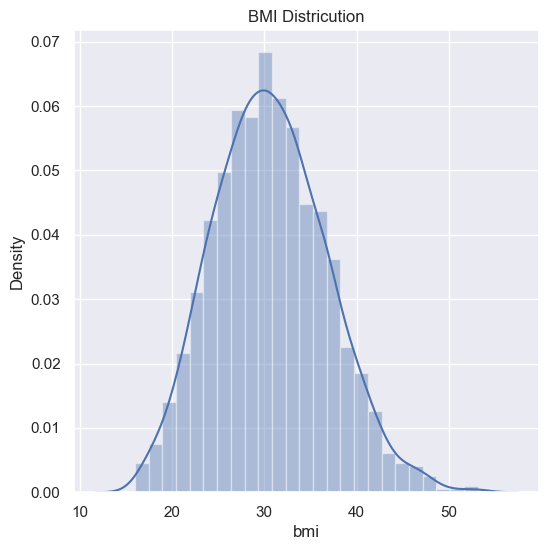

In [84]:
plt.figure(figsize=(6,6))
sns.distplot(insurance['bmi'])
plt.title('BMI Districution')

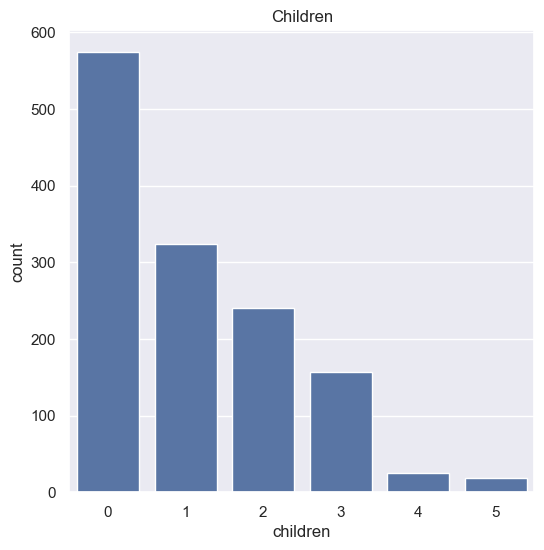

In [85]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance)
plt.title('Children')
plt.show()


In [86]:
insurance['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

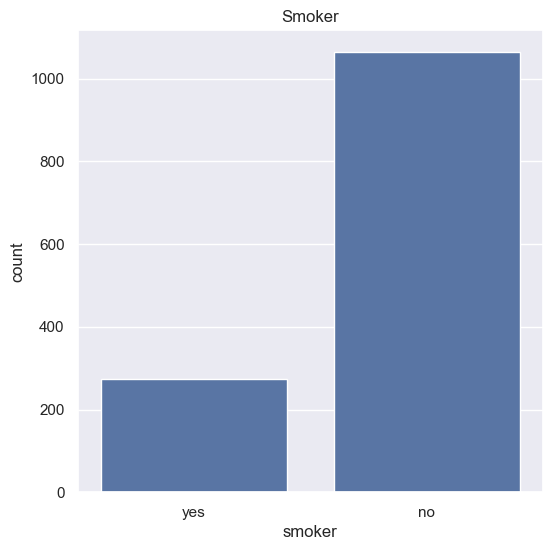

In [87]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance)
plt.title('Smoker')
plt.show()


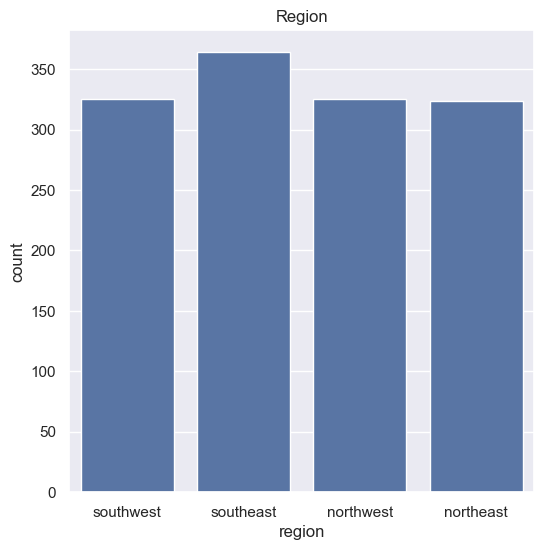

In [88]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance)
plt.title('Region')
plt.show()

In [89]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\yugag\AppData\Local\Temp\ipykernel_17740\500758859.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


Text(0.5, 1.0, 'Charge Distribution')

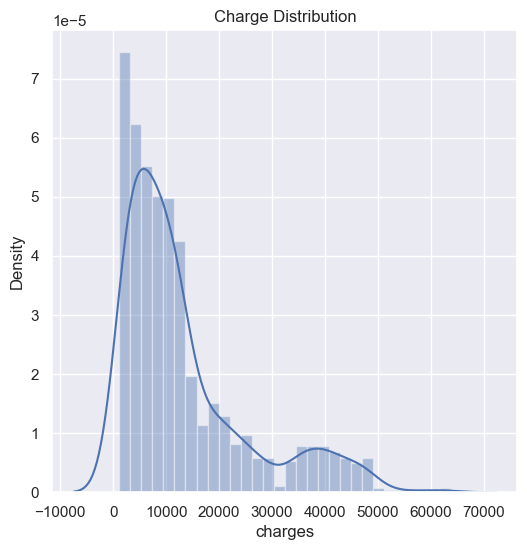

In [90]:
plt.figure(figsize=(6,6))
sns.distplot(insurance['charges'])
plt.title('Charge Distribution')

In [91]:
insurance.replace({'sex':{'male': 0, 'female':1}}, inplace=True)

insurance.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

insurance.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

C:\Users\yugag\AppData\Local\Temp\ipykernel_17740\2556023922.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replace({'sex':{'male': 0, 'female':1}}, inplace=True)
C:\Users\yugag\AppData\Local\Temp\ipykernel_17740\2556023922.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
C:\Users\yugag\AppData\Local\Temp\ipykernel_17740\2556023922.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

In [92]:
X = insurance.drop(columns = 'charges', axis =1)
Y = insurance['charges']

In [93]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [94]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [96]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [97]:
regressor = LinearRegression()

In [98]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [99]:
training_data_prediction = regressor.predict(X_train)

In [100]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value :', r2_train)

R squared value : 0.751505643411174


In [101]:
test_data_prediction = regressor.predict(X_test)

In [102]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print ('R squared value : ',r2_test)

R squared value :  0.7447273869684077


In [103]:
input_data =(31, 1,25.74,0,1,0)

input_data_as_np_array = np.asarray(input_data)

input_data_reshaped = input_data_as_np_array.reshape(1, -1)

prediction =regressor.predict(input_data_reshaped)
print(prediction)

[3760.0805765]


C:\Users\yugag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
